# Introduction into Python computer vision tools

This assignment we won't do any computer vision yet, but we'll setup and get familiar with the tools we will be using for the rest of this course. This assignment will not be graded. 

by Peter Heemskerk


## Installation

First things first, please make sure that you have installed the following packages:

- python3
- python3 packages numpy, matplotlib, opencv and Pillow
- jupyther notebook. 

For installation procedure, refer to doc: "intallation guide" [source: PythonGettingStartedCV.pdf]


## Python packages: Matplotlib, Numpy, Opencv and Pillow

*Matplotlib* is a plotting library for *Python*. Importing the module

*NumPy* is a Python package that is great for working with N-dimensional arrays and its operations; things like matrix multiplication and matrix inversion already come built in. 

Instead of explicitely import these packages, one can also use the magic command '%pylab inline' that imports amongst others Matplotlib and Numpy, and your plots will appear inline. 

*Opencv* is used for loading, processing and visualising images. Import it in Python under the name cv2.

*Pillow* is also used for loading, processing and visualising images. It is a bit more modern than Opencv. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

## Numpy

If you need an introduction into Python Numpy, please go trough lab0_Numpy notebook.

Below you find a little exercise to test whether you can work with Numpy

## Numpy Exercises

1. Create a numpy array (vector) of the even whole numbers between 10 and 49.

2. Let X = np.array([5, 3, 1, 8]).reshape(4,1) (a column vector) and Y = np.array([4, 1, 7, 5]).reshape(1,4)

    - Raise each element of X to the power specified by the corresponding element in Y.
    - Divide each element in X by the corresponding element in Y. 
    

3. Given the vector t = np.arange(1, 2, 0.1) write down the expressions that will compute the following:

    - $ln(2 + t + t^2 )$
    - $e^{1+cos(3t)}$
    - $cos^2(t) + sin^2(t)$
    - $tan^{−1}(t)$
    
    
4. Given x = np.array([3, 1, 5, 7, 9, 2, 6]), observe the output of the commands (do it by hand
before typing them in).

    - x[3]
    - x[-1]
    - x[0:6]
    - x[0:]
    - x[1:-1]
    - x[6:1:-2]
    - x[:]
    
    
5. Given the matrix A = np.array([[2, 4, 1], [6, 7, 2], [3, 5, 9]]), provide the commands needed to

    - assign the first row of A to a vector called x
    - assign the last 2 rows of A to a matrix called y
    - compute the sum over the columns of A
    - compute the sum over the rows of A
    - compute the mean over all the elements of A
    - compute the standard deviation over all the elements of A
    
    
6. Given x = np.array([6, 1, -8]), y = np.array([1, 1, 2]) and A = np.array([[-3, 0, 3],[6, -2, 6]]), determine which of the following statements will correctly execute and provide the result. Try to understand why it fails.

    - x + y
    - x + A
    - x.T + y

## Using matplotlib

We can now start plotting a line. 

    plt.plot([1,2,3,4])

The `plot` function is the core function of the library. The above function call
plots the 4 y-values with implicit x-values of `range(4)`. Usually you would
use the function as `plt.plot(xvalues, yvalues, label="some_text")`. In this
case you must make sure that `xvalues` and `yvalues` are the same size (as the
first x-value will be plotted with the first y-value, and the second with the
second, etc.). The full documentation for the `plot` function can be found here:
[Plot Documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)

And finally, you should not forget to show your plot

    plt.show()

This tells matplotlib that you are done adding lines, labels and other stuff to your figure. A simple example to test with can be found below

In [ ]:
xvalues = range(10)
yvalues = [x**2 for x in xvalues]
plt.plot(xvalues, yvalues)
plt.show()

## More on plotting (2D)

To create 2D line plots, use Python’s built-in plot function (matplotlib). 

Let us now have a look at an example of plotting the value of the sine function from 0 to 2π. After typing in the following statements, you should see a nice sine function on the screen. Try it also with different x values, such as x 2 , -x and x + π, then observe the changes in the plot.

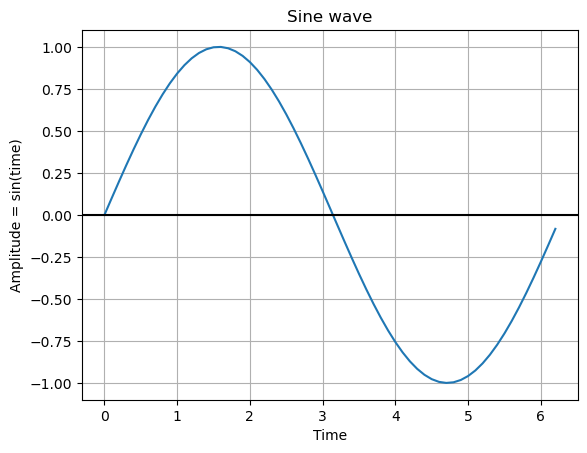

In [3]:
# Get x values of the sine wave
x = np.arange(0, 2*np.pi, 0.1);

# Amplitude of the sine wave is sine of a variable like time
amplitude   = np.sin(x)

# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(x, amplitude)

# Give a title, and labels for the sine wave plot
plt.title('Sine wave')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')

# Give a grid and thick line on x
plt.grid(True, which='both')
plt.axhline(y=0, color='k')

# Display the sine wave
plt.show()

## More on plotting (3D)

To create 3D line plots, use Python’s built-in plot function (matplotlib).

We will plot some 3D function and a 2D gaussian function.

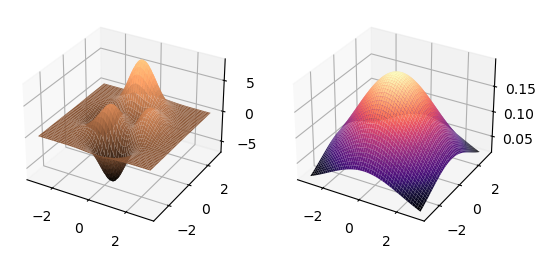

In [4]:
# %matplotlib qt  # use this in case you want an interactive 3D plot
from mpl_toolkits.mplot3d import Axes3D

# create meshgrid for x and y axis
x = np.linspace(-3, 3, 150)
y = np.linspace(-3, 3, 150)
X, Y = np.meshgrid(x, y)

# some 3D function - (you may recognise the Matlab signature) 
F = 3 * (1-X)**2 * np.exp(-(X**2) - (Y+1)**2) - 10 * (X/5 - X**3 - Y**5) * np.exp(-X**2 - Y**2) \
    - 1/3 * np.exp(-(X+1)**2 - Y**2) 

# a 2D gaussian function
sigma=2
G = np.exp(-(X**2+Y**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi)) 

fig = plt.figure(99)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, F, cmap='copper');
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, G, cmap='magma');

### Plotting Exercises

1. Plot the function Y = 5x 3 − 3x 2 + 7x − 2 for x ∈ [−4, 4].
2. Given the function Z = (sin(Y 2 + X) − cos(Y − X 2 )), where X and Y lies
between [0, π], visualize it by using mesh function.

## Image Processing

Python supports several ways for image processing. The most commonly known are the matplotlib, the open_cv and the PIL libraries. 

The following is shown (based on open_cv):
- reading and writing image
- image is 3D array
- playing around with BRG/RGB, Graying, Histogram equalisation

Very short intro in PIL
- reading, conversion to array
- students are asked to do displaying, saving, graying, .... in Pillow 


### Using Matplotlib

As you can see below, matplotlib does support basic image reading, plotting and saving.

It is key to see that images are respresented as arrays (2D for gray, 3D for colour). 

(384, 512, 3)
float32


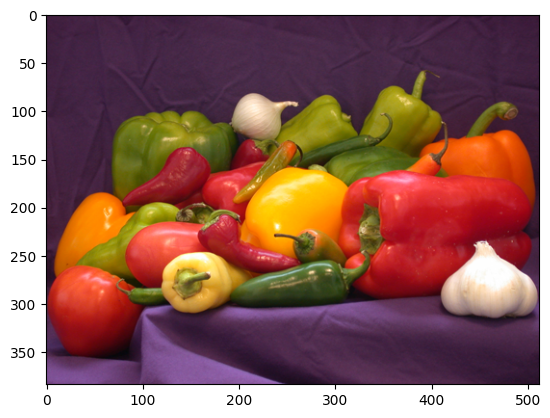

In [2]:
# Python program to read, plot and save image using matplotlib 

# Read Images - make sure that the file is in the same directory as the notebook
imgA = plt.imread('images/mypeppers.png') 

# Display array shape and element type
print(imgA.shape)      # shape of image array
print(imgA.dtype)      # float32

# Showing of Image 
plt.figure ()       # new figure to plot
plt.imshow(imgA) 



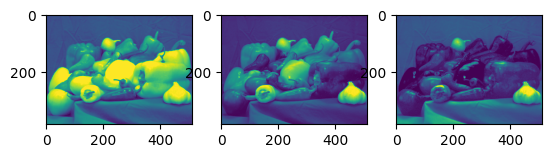

In [3]:
# showing every seperate of RGB channel in subplot

fig = plt.figure()

plt.subplot(1, 3, 1)
plt.imshow(imgA[:, :, 0])    # Red

plt.subplot(1, 3, 2)
plt.imshow(imgA[:, :, 1])    # Green

plt.subplot(1, 3, 3)
plt.imshow(imgA[:, :, 2])    # Blue

# saving plot
fig.savefig('images/myimages.jpg', bbox_inches='tight', dpi=150)

### Using Open_cv (cv2)

Open_cv is specialised python package with quite a few image processing features. 

Note, that different than Matplotlib (and later PIL), open_cv uses BGR in stead of RGB. 

Another specificity is that for plotting open_cv opens a new window. 
YOU HAVE TO MANUALLY CLOSE THIS WINDOW (e.g. by pressing 'space').

In [3]:
# Python program to read image using OpenCV   
  
# Read image 
imgB = cv2.imread('images/lena.jpg')               # Make sure that this is in correct directory

# print array
print('shape of original image:', imgB.shape)                           # array shape
print(imgB.dtype)                           # unint8



shape of original image: (225, 400, 3)
uint8


In [4]:


# Output img with window name as 'image' 
cv2.imshow('image with opencv', imgB)

# Maintain output window until user presses a key
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure()
plt.title('image with matplotlib')
plt.imshow(imgB)

# Notice the difference. Using plt (matplotlib) the colors are mixed up. 
# in order to produce the same print, we first have to convert the image. 

imgB_rgb = cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB)
plt.figure()
plt.title('image with matplotlib after conversion to RGB')
plt.imshow(imgB_rgb) 

# You get the same result if you use Numpy to rotate the 3th dimension
imgB_rgb_np = imgB[:, :, [2, 1, 0]]
plt.figure()
plt.title('image with matplotlib after conversion to RGB with Numpy')
plt.imshow(imgB_rgb_np)

# From here we are using opencv BGR standard. 

# Open cv can convert to gray
imgB_gray = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)
print('shape after graying:', imgB_gray.shape)
cv2.imshow('grayed image', imgB_gray)  
cv2.waitKey(0)         
cv2.destroyAllWindows() 

# Open cv can resize image with opencv
imgB_small = cv2.resize(imgB, (0,0), fx=0.5, fy=0.5) 
print('original shape:', imgB.shape)
print('shape after resizing:', imgB_small.shape)
cv2.imshow('resized image', imgB_small)  
cv2.waitKey(0)         
cv2.destroyAllWindows() 

# Open cv can equalize images with the Histogram equalizer. 
# (refer to: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html)

imgB_equ = cv2.equalizeHist(imgB_gray)

# Histogram equalisation gives a remarkable effect on a grayed image. 
# The original and equilized image are combined and saved. 
res = np.hstack((imgB_gray, imgB_equ)) #stacking images side-by-side
cv2.imwrite('./images/EqualizingResult.png',res)


: 

: 

### Using Python Imaging Library PIL (Pillow)

Pillow is a modern imaging processing library. It is not just an alternative for Matplotlib or OpenCV. PIL is the standard for image pre-processing in Pytorch. Pytorch will be used the second half of the course for creating neural networks. It is not yet part of this notebook. 

One of the differences is that the image is stored as a PIL object, with several pieces of information attached. PIL uses RGB format (as Matplotlib)

In [3]:
# Python program to read image using PIL module 
  
# Read image 
imgC = Image.open('./images/mypeppers.png') 
  
# Output Images 
imgC.show() 
  
# prints format, mode, size of image 
print('format:', imgC.format) 
print('mode:', imgC.mode) 
print('size:', imgC.size)

# the array can be accessed as follows:
imgC_array = np.array(imgC)
print('shape of PIL image:', imgC_array.shape)

# saving in another format jpeg
imgC.save('./images/mypeppers.jpg', 'jpeg')  

# PIL has many image processing capabilities. See tutorial

# graying
imgC_gray = imgC.convert('L')
imgC_gray.show()

# rotating
imgC_rotated = imgC.rotate(45)
imgC_rotated.show() 

# Pillow can also take images arrays which are read by open_cv
# Notice that such an open_cv first has to be converted to RGB. 
pil_img = Image.fromarray(imgB_rgb)
pil_img.show()


format: PNG
mode: RGB
size: (512, 384)
shape of PIL image: (384, 512, 3)


# 5 Final Exercises

## 1. 

Write a function that takes an image as its input, divides the image into 4
pieces and create a new image by changing the order of the pieces of the
original image. In the end, the function should
display both the original and the newly created image separately. (Hint: use
subplot).

## 2. 

Write a function that takes an RGB image as its input. Divide the image into
red, green and blue components as matrices R, G and B. Create a new image
by reordering the colors as BGR (Hint: use cat, do not use open_cv RGB conversion). 
Display the original image and the new one in a 2-by-1 layout (Hint: use subplot).

## 3. 

Create a 100 x 100 matrix of random integer numbers and name it A (Hint:
use randi ). Move a window of size 3 x 3 over the matrix A and compute the
average of the 9 elements within this window. Store the computed averaging
results in matrix B (Matrix B is expected to be of size 98 x 98, since you will
exclude the first and the last rows and columns of A from your computations).

In [ ]:
# --------------
# YOUR CODE HERE
# --------------